## Ejercicio para tus Alumnos: Regresión y Clasificación con el Dataset de Bike Sharing

### Instrucciones Generales
- Descarga el dataset de Bike Sharing de la UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)
- Explora y prepara los datos
- Desarrolla un modelo de regresión para predecir el número de alquileres
- Desarrolla un modelo de clasificación para predecir categorías de demanda
- Evalúa y compara ambos modelos

### Ejercicio de Regresión

#### Carga y exploración inicial de datos
1. Cargar el dataset
2. Explorar la estructura de los datos (shape, info, describe)
3. Visualizar la distribución de alquileres de bicicletas
4. Analizar correlaciones entre variables
#### Preprocesamiento de datos
5. Manejar valores nulos si existen
6. Codificar variables categóricas (día de la semana, temporada, etc.)
7. Normalizar variables numéricas
8. Dividir en conjuntos de entrenamiento y prueba
#### Construcción del modelo de regresión
9. Diseñar la arquitectura de la red neuronal
10. Configurar hiperparámetros iniciales
11. Compilar el modelo usando la función de pérdida adecuada para regresión (MSE)
12. Implementar callbacks (EarlyStopping, ReduceLROnPlateau)
#### Entrenamiento y evaluación
13. Entrenar el modelo
14. Visualizar las curvas de aprendizaje
15. Evaluar en el conjunto de prueba (MSE, MAE, R²)
16. Visualizar predicciones vs valores reales
#### Optimización
17. Ajustar hiperparámetros (tasa de aprendizaje, arquitectura, etc.)
18. Probar diferentes combinaciones de características
19. Implementar regularización si es necesario
20. Pasos Detallados para el Ejercicio de Clasificación


### Problema de Clasificación
1. Crear categorías basadas en el número de alquileres (por ejemplo, 'baja', 'media', 'alta')
2. Visualizar la distribución de las clases
#### Preparación de datos para clasificación
3. Codificar la variable objetivo (one-hot encoding)
4. Asegurar balance de clases o implementar técnicas para manejar desbalance
#### Construcción del modelo de clasificación
5. Diseñar la arquitectura de la red neuronal (similar a la de regresión pero con ajustes)
6. Usar activación softmax en la capa de salida
7. Compilar con función de pérdida categorical_crossentropy
8. Añadir métricas de clasificación (accuracy, precision, recall)
#### Entrenamiento y evaluación
9. Entrenar el modelo de clasificación
10. Visualizar la matriz de confusión
11. Calcular métricas por clase (precision, recall, F1-score)
12. Generar curva ROC para problemas multiclase
#### Optimización y comparación
13. Ajustar hiperparámetros
14. Comparar con otros algoritmos de clasificación
15. Evaluar importancia de características


In [1]:
import zipfile
import os

# Descomprimir el archivo ZIP
with zipfile.ZipFile('bike+sharing+dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('bike_sharing_data')

In [2]:
import pandas as pd

df = pd.read_csv('bike_sharing_data/hour.csv')  

In [3]:
print(df.shape)
print(df.info())
print(df.describe())

(17379, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
          instant        season 

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

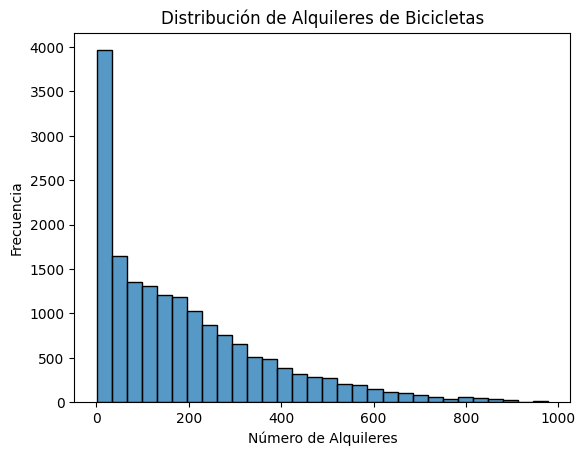

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['cnt'], bins=30)
plt.title('Distribución de Alquileres de Bicicletas')
plt.xlabel('Número de Alquileres')
plt.ylabel('Frecuencia')
plt.show()

In [9]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [10]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

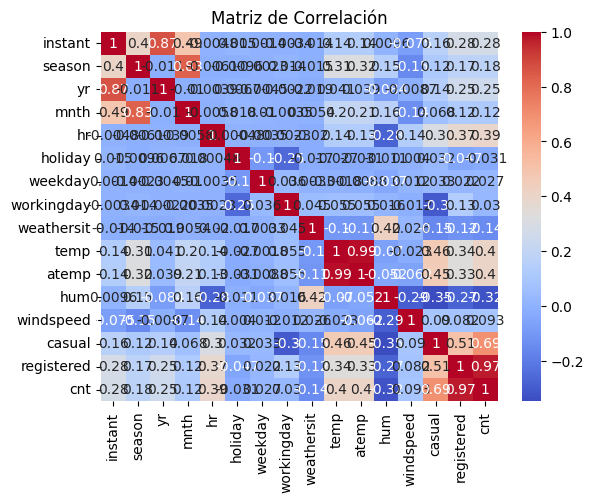

In [11]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [12]:
# Revisar valores nulos
print(df.isnull().sum())

# Rellenar valores nulos (opción: con la media o eliminar)
df.fillna(df.mean(), inplace=True)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
# Codificar variables categóricas
df = pd.get_dummies(df, columns=['season', 'weekday'], drop_first=True)

In [17]:
from sklearn.preprocessing import StandardScaler
# Normalizar variables categóricas
scaler = StandardScaler()
df[['temp', 'hum']] = scaler.fit_transform(df[['temp', 'hum']])

In [18]:
from sklearn.preprocessing import StandardScaler
# Normaliza variables numericas
scaler = StandardScaler()
df[['temp', 'hum']] = scaler.fit_transform(df[['temp', 'hum']])


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('cnt', axis=1)  # Características
y = df['cnt']  # Objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from keras.models import Sequential
from keras.layers import Dense

# Construcción del modelo de regresión
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Salida para regresión


c:\Users\nuria\OneDrive\Escritorio\Data Science\DS102024\3-MachineLearning\7-DeepLearning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5)

Epoch 1/100


c:\Users\nuria\OneDrive\Escritorio\Data Science\DS102024\3-MachineLearning\7-DeepLearning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


348/348 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 47799.7383 - val_loss: 71.1898 - learning_rate: 0.0010
Epoch 2/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 63.2351 - val_loss: 28.0726 - learning_rate: 0.0010
Epoch 3/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.0467 - val_loss: 9.0606 - learning_rate: 0.0010
Epoch 4/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.2987 - val_loss: 4.7432 - learning_rate: 0.0010
Epoch 5/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9711 - val_loss: 19.1121 - learning_rate: 0.0010
Epoch 6/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9344 - val_loss: 7.9713 - learning_rate: 0.0010
Epoch 7/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.8774 - val_loss: 1.5119 - learning_rate: 0.0010
Epoch 8/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.0840 - val_loss: 98.7651 - learning_rate: 0.0010
Epoch 9/100
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 31.8529 - val_loss: 50.5763 - learning_rate: 0.0010


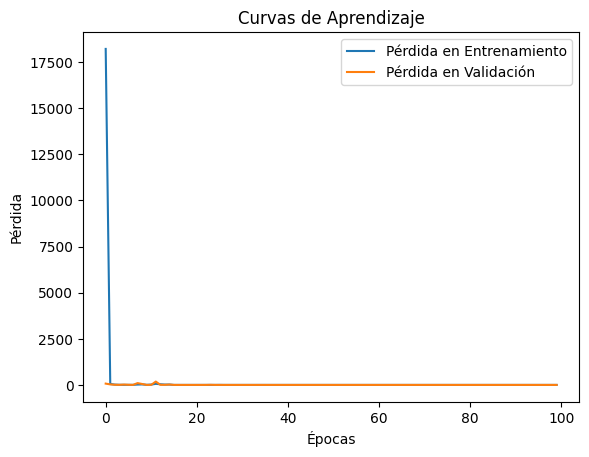

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('bike_sharing_data/hour.csv')

# Convertir columna de fecha
df['dteday'] = pd.to_datetime(df['dteday'])
df['year'] = df['dteday'].dt.year
df['month'] = df['dteday'].dt.month
df['day'] = df['dteday'].dt.day
df['day_of_week'] = df['dteday'].dt.dayofweek
df.drop('dteday', axis=1, inplace=True)

# Manejar valores nulos
df.fillna(df.mean(), inplace=True)

# Codificar variables categóricas
df = pd.get_dummies(df, columns=['season', 'weekday'], drop_first=True)

# Normalizar variables numéricas
scaler = StandardScaler()
df[['temp', 'hum']] = scaler.fit_transform(df[['temp', 'hum']])

# Dividir en conjuntos de entrenamiento y prueba
X = df.drop('cnt', axis=1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diseñar la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Salida para regresión

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Implementar callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5)

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping, reduce_lr])

# Visualizar las curvas de aprendizaje
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.title('Curvas de Aprendizaje')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


## Clasificación

In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

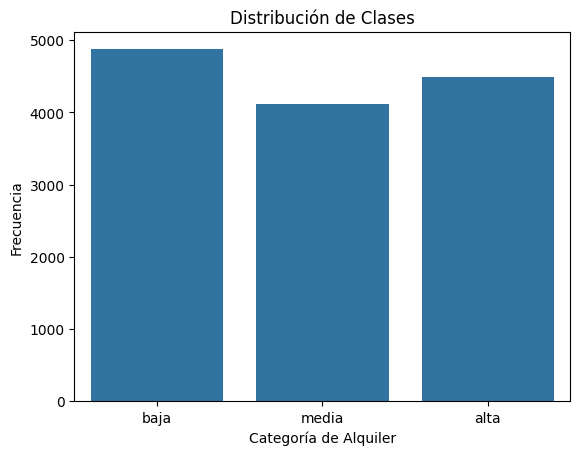

ValueError: could not convert string to float: '2011-01-15'

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Cargar el dataset
df = pd.read_csv('bike_sharing_data/hour.csv')

# Crear categorías basadas en el número de alquileres
bins = [0, 50, 150, 300]  # Define los límites para las categorías
labels = ['baja', 'media', 'alta']
df['rental_category'] = pd.cut(df['cnt'], bins=bins, labels=labels)

# Visualizar la distribución de las clases
sns.countplot(x='rental_category', data=df)
plt.title('Distribución de Clases')
plt.xlabel('Categoría de Alquiler')
plt.ylabel('Frecuencia')
plt.show()

# Preparación de datos para clasificación
X = df.drop(['cnt', 'rental_category'], axis=1)
y = df['rental_category']

# Codificar la variable objetivo (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalizar variables numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construcción del modelo de clasificación
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))  # Softmax para clasificación multiclase

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Implementar callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5)

# Entrenar el modelo de clasificación
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping, reduce_lr])

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión')
plt.show()

# Calcular métricas por clase
print(classification_report(y_true_classes, y_pred_classes, target_names=encoder.categories_[0]))

# Generar curva ROC para problemas multiclase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_true_classes == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar curvas ROC
plt.figure()
for i in range(y_encoded.shape[1]):
    plt.plot(fpr[i], tpr[i], label='Clase {} (AUC = {:.2f})'.format(encoder.categories_[0][i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.show()

# Optimización y comparación
# Aquí podrías ajustar hiperparámetros, comparar con otros algoritmos de clasificación y evaluar la importancia de características.
